In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### IMPORT DATA

In [3]:
titanic_train_df=pd.read_csv('BBDD\\Titanic\\train.csv')
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**DATA GENERAL MANIPULATION**

In [3]:
def data_manipulation(df):
    df_2=df.copy(deep=True)
    #DROP COLUMNS
    col_na_percent=75*df_2.shape[0]/100 # number of missing values to have a 75 % na in a column
    df_2.dropna(axis=1, thresh=col_na_percent, inplace=True) 

    #DROP ROWS
    row_na_percent=75*df_2.shape[1]/100 # number of missing values to have a 75 % na in a row
    df_2.dropna(axis=0, thresh=row_na_percent, inplace=True) 
    if 'Survived' in df_2.columns:
        df_2.dropna(axis=0, subset=['Survived'], inplace=True) # drop rows where the missing value is in Survived

    #FILL NA 'AGE' AND FARE
    df_2['Age'].fillna(value=df_2['Age'].median(), inplace=True)
    df_2['Fare'].fillna(value=df_2['Fare'].mean(), inplace=True)
    #FILL NA 'EMBARKED' without changing distribution
    category_distribution = df_2['Embarked'].value_counts(normalize=True)
    missing_indices = df_2['Embarked'].isna()
    random_categories = np.random.choice(category_distribution.index, size=missing_indices.sum(), p=category_distribution.values)
    df_2.loc[missing_indices, 'category'] = random_categories

    #CHANGE GENDER
    df_2['Sex']=df_2['Sex'].apply(lambda row: 0 if row=='male' else 1)

    #ERASE USELESS COLUMNS
    columns_erase=['PassengerId','Ticket','Name','category']
    df_2.drop(columns_erase,axis=1,inplace=True)

    #ONE HOT ENCODE EMBARKED

    df_2=pd.get_dummies(df_2, columns=['Embarked'],drop_first=True,dtype=int)

    return df_2

titanic_train_df_cleaned=data_manipulation(titanic_train_df)
titanic_train_df_cleaned

C:\Users\MiroSh\AppData\Local\Temp\ipykernel_1912\2959714494.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['Age'].fillna(value=df_2['Age'].median(), inplace=True)
C:\Users\MiroSh\AppData\Local\Temp\ipykernel_1912\2959714494.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,28.0,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


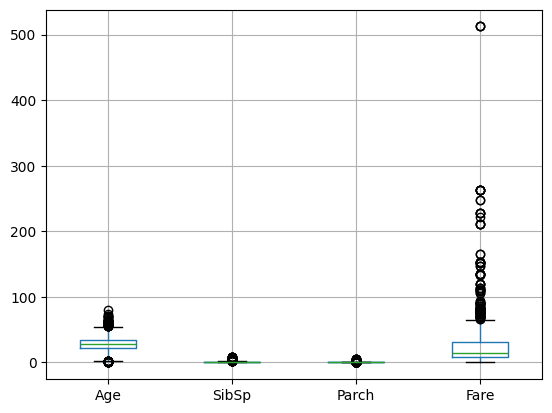

In [4]:
titanic_train_df_cleaned.boxplot(['Age','SibSp','Parch','Fare'])
plt.show()

### PREPROCESING DATA AND DIMENSIONALITY REDUCTION

In [4]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X_unsupervised=titanic_train_df_cleaned.drop(['Survived'],axis=1)
y_unsupervised=titanic_train_df_cleaned['Survived']
label=[0,1]
test_df=pd.read_csv('BBDD\\Titanic\\test.csv')
test_df_cleaned_unsupervised=data_manipulation(test_df)

test_df_cleaned_unsupervised

C:\Users\MiroSh\AppData\Local\Temp\ipykernel_1912\2959714494.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['Age'].fillna(value=df_2['Age'].median(), inplace=True)
C:\Users\MiroSh\AppData\Local\Temp\ipykernel_1912\2959714494.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,1,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0,1
414,1,1,39.0,0,0,108.9000,0,0
415,3,0,38.5,0,0,7.2500,0,1
416,3,0,27.0,0,0,8.0500,0,1


### UNSUPERVISED LEARNING (CLUSTERING)

In [9]:
robust_sc = RobustScaler()
imputer = SimpleImputer(strategy='most_frequent')
k_means_model = KMeans(n_clusters=2, random_state=12)

robust_pipeline=make_pipeline(robust_sc,imputer,k_means_model)
robust_pipeline.fit_transform(X_unsupervised)
robust_pipeline.transform(test_df_cleaned_unsupervised)

labels_train=k_means_model.predict(X_unsupervised)

labels_test=k_means_model.predict(test_df_cleaned_unsupervised)

score=accuracy_score(y_unsupervised,labels_train)
print(score)

def save_predictions_into_csv(pred,df,type):
    df_2=df.copy(deep=True)
    df_2['Survived']=pred
    result_df=df_2[['PassengerId','Survived']]
    result_df.set_index('PassengerId', inplace=True)
    result_df.to_csv(f'Titanic_results\\{type}_predictions.csv')

save_predictions_into_csv(labels_test, test_df, 'unsupervised')



0.6195286195286195


c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


### SUPERVISED LEARNING METHODS

In [5]:
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.tree import DecisionTreeClassifier #decisiontree
from sklearn.linear_model import LogisticRegression, SGDClassifier #logistic regression & Stochastci Gradient Descendent Classifier
from sklearn.svm import SVC #support vector classification
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

#### TUNING HYPER PARAMETERS

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

### METRICS

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
X=titanic_train_df_cleaned.drop(['Survived'],axis=1)
y=titanic_train_df_cleaned['Survived']
df_new=pd.read_csv('BBDD\\Titanic\\test.csv')
X_new=data_manipulation(df_new)

pipeline=make_pipeline(robust_sc, imputer)
pipeline.fit_transform(X)
pipeline.transform(X_new)

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=12)


C:\Users\MiroSh\AppData\Local\Temp\ipykernel_1912\2959714494.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['Age'].fillna(value=df_2['Age'].median(), inplace=True)
C:\Users\MiroSh\AppData\Local\Temp\ipykernel_1912\2959714494.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

***KNN***

In [11]:

def learning_curve_plot(best_model,model_type,search_type,cross_v):
    
    common_params = {
        "X": X,
        "y": y,
        "train_sizes": np.linspace(0.1, 1.0, 20), 
        "cv": ShuffleSplit(n_splits=cross_v, test_size=0.2, random_state=12),  
        "score_type": "both",  
        "line_kw": {"marker": "o"},  
        "std_display_style": "fill_between",  
        "score_name": "Accuracy",  
    }
    plt.figure(figsize=(8, 6))
    LearningCurveDisplay.from_estimator(best_model, **common_params)
    plt.title(f"Learning Curve for {model_type} ({search_type})")
    plt.tight_layout()
    plt.show()

def hyper_params_selection(model,parameters,cross_val, type):
    gridsearch=GridSearchCV(model,parameters, cv=cross_val)
    randsearch=RandomizedSearchCV(model,parameters,cv=cross_val)
    gridsearch.fit(X_train,y_train)
    randsearch.fit(X_train,y_train)
    print(f'Best score grid search {type}: {gridsearch.best_score_}')
    print(f'Best params grid search {type}: {gridsearch.best_params_}')

    print(f'Best score rand search {type}: {randsearch.best_score_}')
    print(f'Best params rand search {type}: {randsearch.best_params_}')

    best_grid=gridsearch.best_estimator_
    rand_grid=randsearch.best_estimator_


    learning_curve_plot(best_grid,type,'Grid search',cross_val)
    learning_curve_plot(rand_grid,type,'Random search',cross_val)


    return gridsearch,randsearch

def compute_metrics(grid,rand,type):
    bestgrid=grid.best_estimator_
    bestrand=rand.best_estimator_

    y_test_pred_grid = bestgrid.predict(X_test)
    y_test_pred_rand = bestrand.predict(X_test)

    test_accuracy_grid = accuracy_score(y_test, y_test_pred_grid)
    test_accuracy_rand = accuracy_score(y_test, y_test_pred_rand)

    print(f'Test Accuracy grid {type}: {test_accuracy_grid}')
    print(f'Test Accuracy rand {type}: {test_accuracy_rand}')


    test_class_report_grid = classification_report(y_test, y_test_pred_grid)
    test_class_report_rand = classification_report(y_test, y_test_pred_rand)

    print(f'Classification Report grid:\n{test_class_report_grid}')
    print(f'Classification Report rand:\n{test_class_report_rand}')

    test_conf_matrix_grid = confusion_matrix(y_test, y_test_pred_grid)
    test_conf_matrix_rand = confusion_matrix(y_test, y_test_pred_rand)

    figure,axis=plt.subplots(1,2)
    sns.heatmap(test_conf_matrix_grid, annot=True, fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], cbar=False, ax=axis[0])
    axis[0].set_title(f'{type} - Grid Search')
    sns.heatmap(test_conf_matrix_rand, annot=True, fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], cbar=False, ax=axis[1])
    axis[1].set_title(f'{type} - Random Search')
    plt.tight_layout()
    plt.show()

def select_best_hyper_params(grid,rand,df,type):
    
    if grid.best_score_>=rand.best_score_:
        y_pred=grid.best_estimator_.predict(X_new)
        save_predictions_into_csv(y_pred,df,type)
    else:
        y_pred=rand.best_estimator_.predict(X_new)
        save_predictions_into_csv(y_pred,df,type)


***KNN:*** Metrics

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best score grid search knn: 0.7384792626728112
Best params grid search knn: {'n_neighbors': np.int64(17), 'weights': 'distance'}
Best score rand search knn: 0.7384792626728112
Best params rand search knn: {'weights': 'distance', 'n_neighbors': np.int64(17)}


<Figure size 800x600 with 0 Axes>

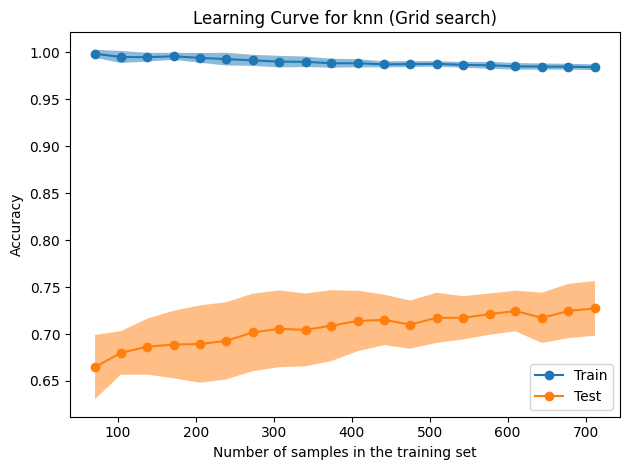

<Figure size 800x600 with 0 Axes>

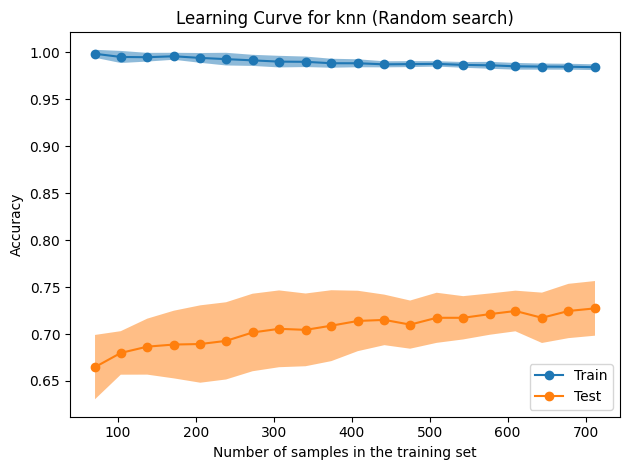

Test Accuracy grid KNN: 0.6977611940298507
Test Accuracy rand KNN: 0.6977611940298507
Classification Report grid:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       161
           1       0.63      0.58      0.60       107

    accuracy                           0.70       268
   macro avg       0.68      0.68      0.68       268
weighted avg       0.69      0.70      0.70       268

Classification Report rand:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       161
           1       0.63      0.58      0.60       107

    accuracy                           0.70       268
   macro avg       0.68      0.68      0.68       268
weighted avg       0.69      0.70      0.70       268



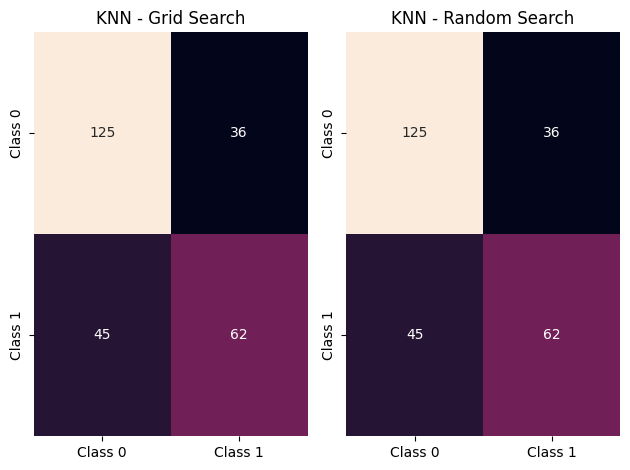

In [12]:
knn=KNeighborsClassifier()
parameters_knn={'n_neighbors':np.arange(10,50,1),'weights':['uniform', 'distance']}
gridsearch_knn,randsearch_knn=hyper_params_selection(knn,parameters_knn,10,'knn')
compute_metrics(gridsearch_knn,randsearch_knn, 'KNN')
select_best_hyper_params(gridsearch_knn,randsearch_knn,df_new, 'knn')


***Decision Tree***

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best score grid search Decision Tree: 0.8428059395801331
Best params grid search Decision Tree: {'criterion': 'entropy', 'min_samples_split': np.int64(40), 'splitter': 'random'}
Best score rand search Decision Tree: 0.8315668202764976
Best params rand search Decision Tree: {'splitter': 'random', 'min_samples_split': np.int64(74), 'criterion': 'log_loss'}


<Figure size 800x600 with 0 Axes>

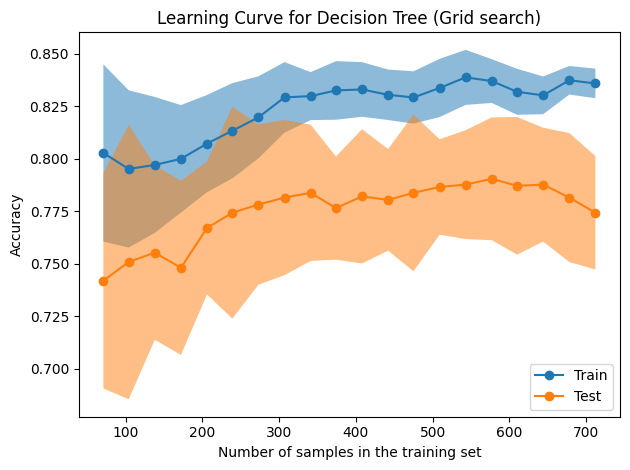

<Figure size 800x600 with 0 Axes>

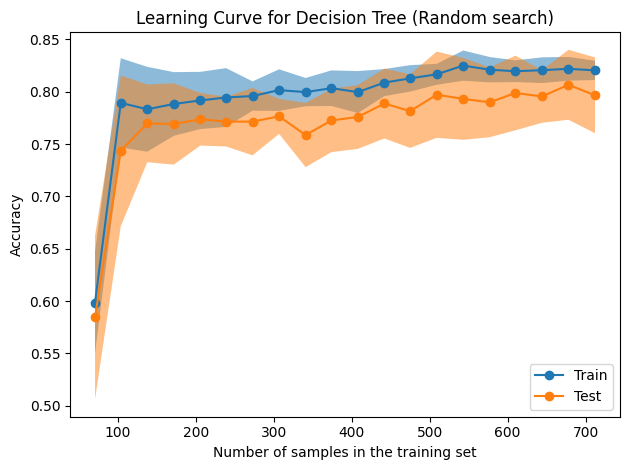

Test Accuracy grid Decision Tree: 0.7723880597014925
Test Accuracy rand Decision Tree: 0.7574626865671642
Classification Report grid:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       161
           1       0.81      0.56      0.66       107

    accuracy                           0.77       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.77      0.76       268

Classification Report rand:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       161
           1       0.82      0.50      0.62       107

    accuracy                           0.76       268
   macro avg       0.78      0.72      0.72       268
weighted avg       0.77      0.76      0.74       268



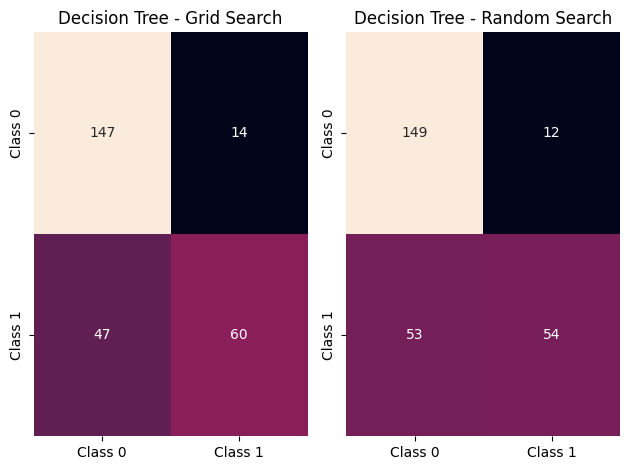

In [13]:
dt=DecisionTreeClassifier()
parameters_dt={'min_samples_split':np.arange(2,100), 'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gridsearch_dt,randsearch_dt=hyper_params_selection(dt,parameters_dt,10,'Decision Tree')
compute_metrics(gridsearch_dt,randsearch_dt, 'Decision Tree')
select_best_hyper_params(gridsearch_dt,randsearch_dt,df_new, 'dt')

***Logistic Regression***

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best score grid search Logistic Regression: 0.8027137736815156
Best params grid search Logistic Regression: {'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score rand search Logistic Regression: 0.7994879672299027
Best params rand search Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 10}


c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

<Figure size 800x600 with 0 Axes>

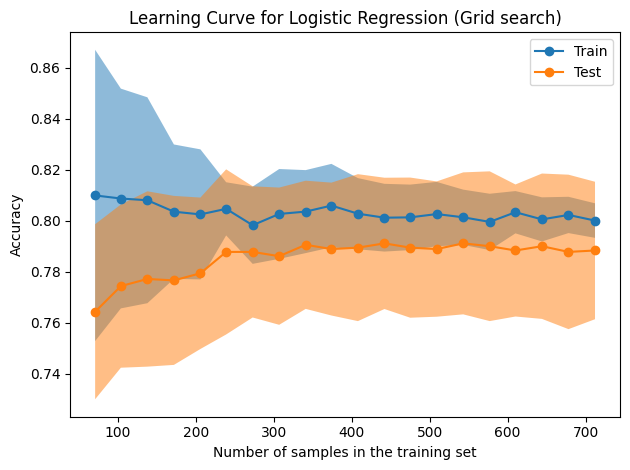

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

<Figure size 800x600 with 0 Axes>

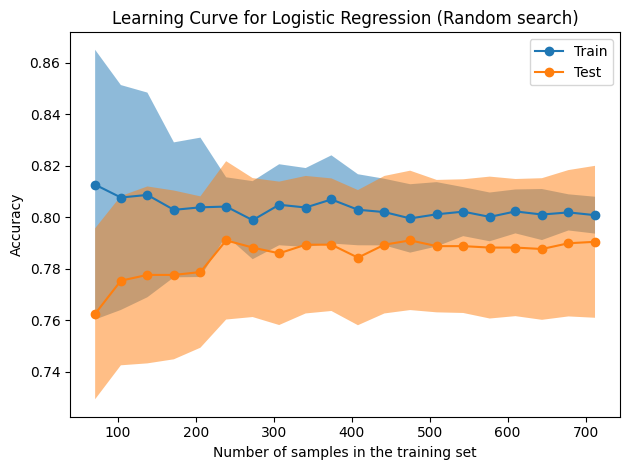

Test Accuracy grid Logistic Regression: 0.7761194029850746
Test Accuracy rand Logistic Regression: 0.7723880597014925
Classification Report grid:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       161
           1       0.76      0.64      0.70       107

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.78      0.77       268

Classification Report rand:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       161
           1       0.75      0.64      0.69       107

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



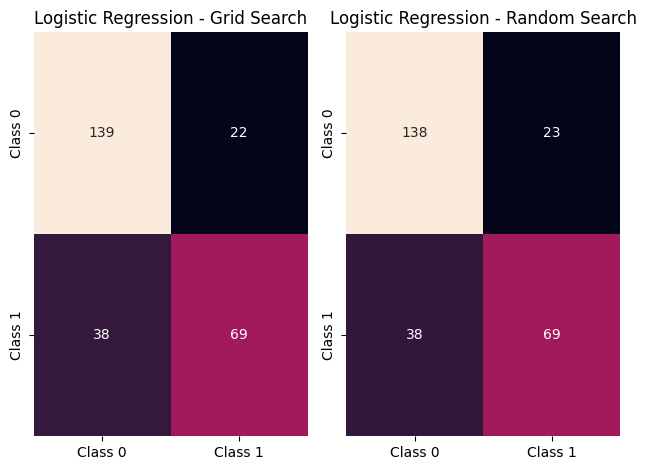

In [14]:
logreg=LogisticRegression()
parameters_logreg={'penalty':['None','l2','l1','elasticnet'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'max_iter':[10,100,1000]}
gridsearch_logreg,randsearch_logreg=hyper_params_selection(logreg,parameters_logreg,10,'Logistic Regression')
compute_metrics(gridsearch_logreg,randsearch_logreg, 'Logistic Regression')
select_best_hyper_params(gridsearch_logreg,randsearch_logreg,df_new, 'logreg')

***SVM***

In [15]:
"""svm=SVC()
parameters_svm={'C':np.arange(0.1,1,0.1),'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr'], 'random_state':[12]}
gridsearch_svm,randsearch_svm=hyper_params_selection(svm,parameters_svm,5,'SVM')
compute_metrics(gridsearch_svm,randsearch_svm, 'SVM')
select_best_hyper_params(gridsearch_svm,randsearch_svm,df_new, 'svm')"""

"svm=SVC()\nparameters_svm={'C':np.arange(0.1,1,0.1),'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr'], 'random_state':[12]}\ngridsearch_svm,randsearch_svm=hyper_params_selection(svm,parameters_svm,5,'SVM')\ncompute_metrics(gridsearch_svm,randsearch_svm, 'SVM')\nselect_best_hyper_params(gridsearch_svm,randsearch_svm,df_new, 'svm')"

***SGDClassifier***

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

Best score grid search SGDClassifier: 0.7527870967741936
Best params grid search SGDClassifier: {'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 100, 'penalty': 'l1', 'random_state': 12}
Best score rand search SGDClassifier: 0.7016774193548387
Best params rand search SGDClassifier: {'random_state': 12, 'penalty': 'l1', 'max_iter': 10, 'loss': 'perceptron', 'learning_rate': 'optimal'}


<Figure size 800x600 with 0 Axes>

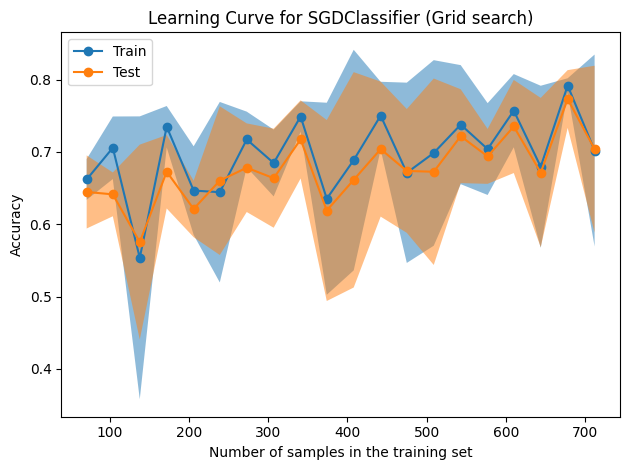

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

<Figure size 800x600 with 0 Axes>

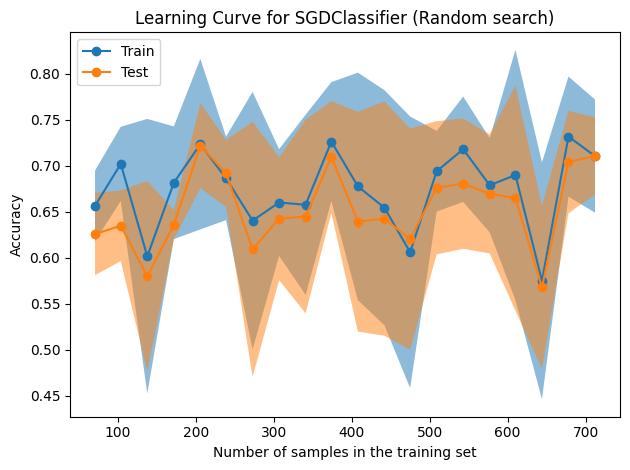

Test Accuracy grid SGDClassifier: 0.7798507462686567
Test Accuracy rand SGDClassifier: 0.7798507462686567
Classification Report grid:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       161
           1       0.73      0.71      0.72       107

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

Classification Report rand:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       161
           1       0.77      0.64      0.70       107

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



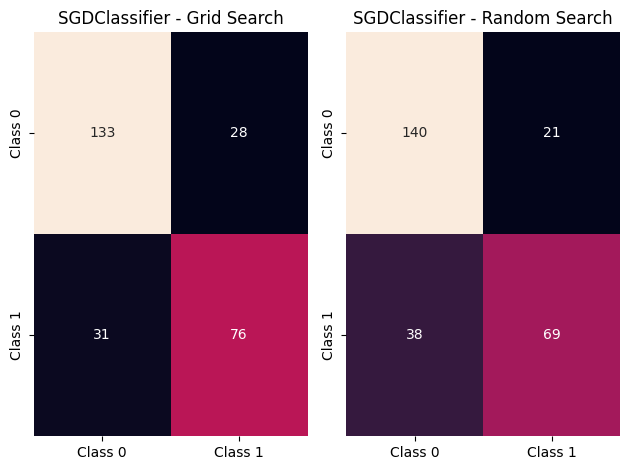

In [16]:
sgdc=SGDClassifier()
parameters_SGDC={'loss':['log_loss','perceptron','squared_error'],'penalty':['l2','l1','elasticnet','None'],'max_iter':[10,100,1000],'random_state':[12],'learning_rate':['constant','optimal','invscaling','adaptative']}
gridsearch_SGDC,randsearch_SGDC=hyper_params_selection(sgdc,parameters_SGDC,5,'SGDClassifier')
compute_metrics(gridsearch_SGDC,randsearch_SGDC, 'SGDClassifier')
select_best_hyper_params(gridsearch_SGDC,randsearch_SGDC,df_new, 'SGDC')

### Ensemble models

In [13]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier

***GradientBoostingClassifier***

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best score grid search GradientBoostingClassifier: 0.8571870967741935
Best params grid search GradientBoostingClassifier: {'criterion': 'friedman_mse', 'learning_rate': np.float64(0.03), 'loss': 'log_loss', 'n_estimators': 100, 'random_state': 12}
Best score rand search GradientBoostingClassifier: 0.8539483870967743
Best params rand search GradientBoostingClassifier: {'random_state': 12, 'n_estimators': 100, 'loss': 'log_loss', 'learning_rate': np.float64(0.04), 'criterion': 'friedman_mse'}


<Figure size 800x600 with 0 Axes>

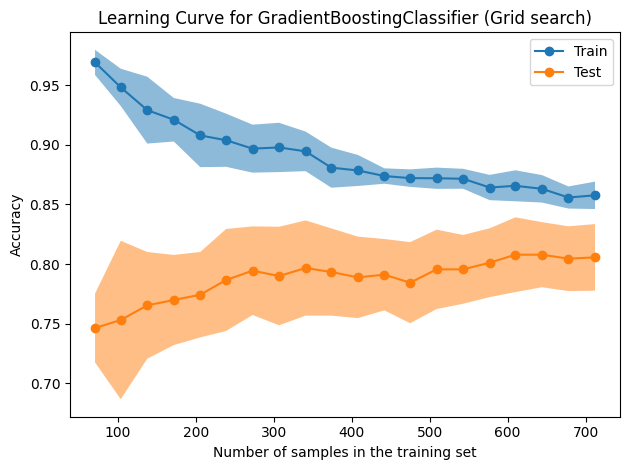

<Figure size 800x600 with 0 Axes>

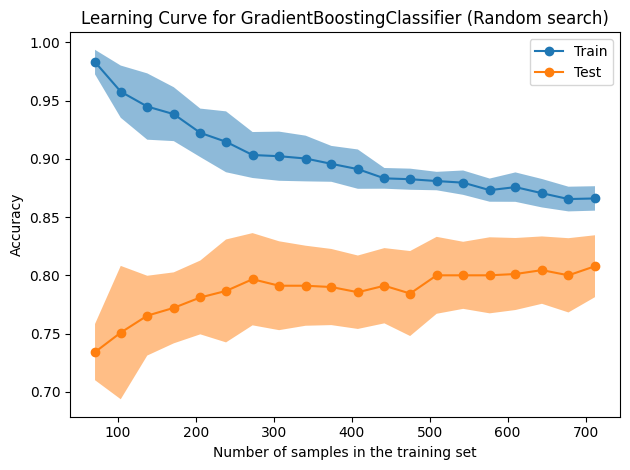

Test Accuracy grid GradientBoostingClassifier: 0.7910447761194029
Test Accuracy rand GradientBoostingClassifier: 0.7873134328358209
Classification Report grid:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       161
           1       0.83      0.60      0.70       107

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.80      0.79      0.78       268

Classification Report rand:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       161
           1       0.82      0.60      0.69       107

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.76       268
weighted avg       0.79      0.79      0.78       268



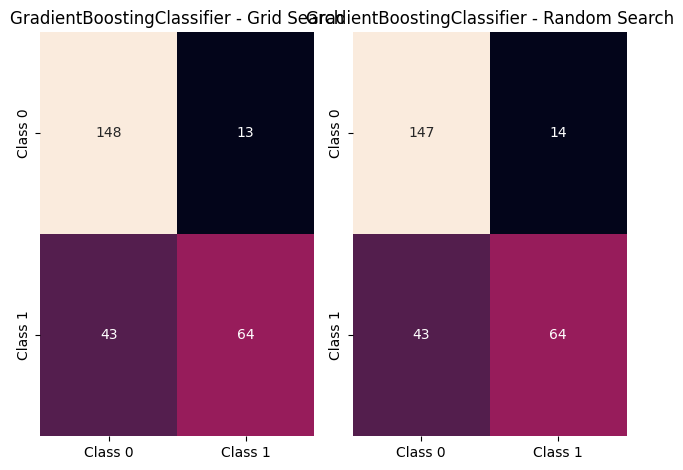

In [18]:
gbc=GradientBoostingClassifier()
parameters_gbc={'loss':['log_loss','exponential'],'learning_rate':np.arange(0.01,0.1,0.01),'n_estimators':[100,200,500,1000],'criterion':['friedman_mse','squared_error'],'random_state':[12]}
gridsearch_gbc,randsearch_gbc=hyper_params_selection(gbc, parameters_gbc,5,'GradientBoostingClassifier')
compute_metrics(gridsearch_gbc,randsearch_gbc, 'GradientBoostingClassifier')
select_best_hyper_params(gridsearch_gbc,randsearch_gbc,df_new, 'GradientBoostingClassifier')


***VotingClassifier***

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best score grid search VotingClassifier: 0.8137419354838709
Best params grid search VotingClassifier: {'voting': 'hard'}
Best score rand search VotingClassifier: 0.7930193548387096
Best params rand search VotingClassifier: {'voting': 'hard'}


c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

<Figure size 800x600 with 0 Axes>

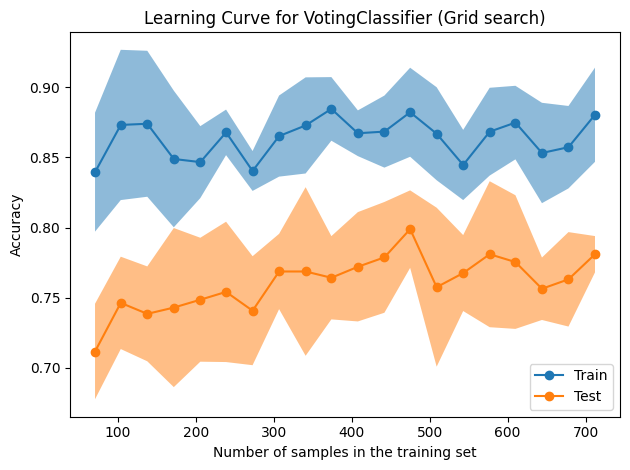

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

<Figure size 800x600 with 0 Axes>

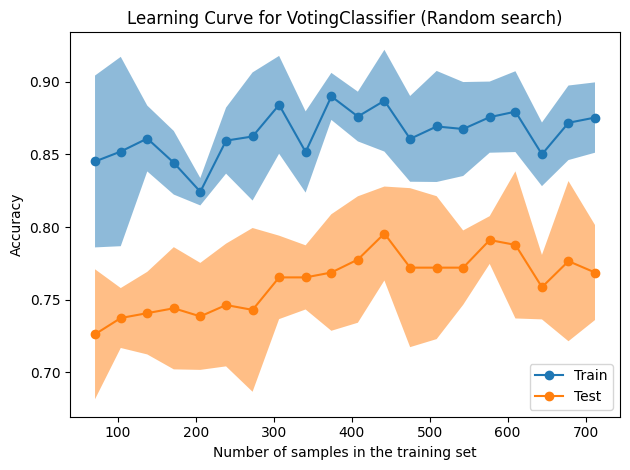

Test Accuracy grid VotingClassifier: 0.7873134328358209
Test Accuracy rand VotingClassifier: 0.7611940298507462
Classification Report grid:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       161
           1       0.76      0.68      0.72       107

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

Classification Report rand:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       161
           1       0.74      0.63      0.68       107

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



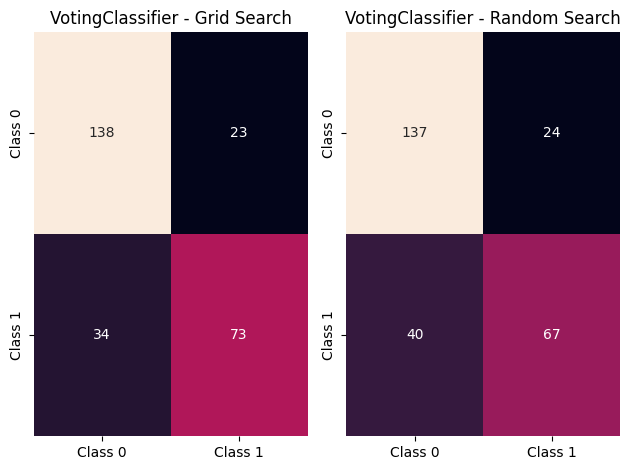

In [19]:
vc=VotingClassifier(estimators=[('knn', knn), ('dt', dt), ('logreg', logreg), ('sgdc', sgdc)])
parameters_vc={'voting':['hard','soft']}
gridsearch_vc,randsearch_vc=hyper_params_selection(vc, parameters_vc,5,'VotingClassifier')
compute_metrics(gridsearch_vc,randsearch_vc, 'VotingClassifier')
select_best_hyper_params(gridsearch_vc,randsearch_vc,df_new, 'VotingClassifier')

***RandomForestClassifier***

c:\Users\MiroSh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best score grid search RandomForestClassifier: 0.8522967741935485
Best params grid search RandomForestClassifier: {'criterion': 'entropy', 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 12}
Best score rand search RandomForestClassifier: 0.8522967741935485
Best params rand search RandomForestClassifier: {'random_state': 12, 'n_estimators': 50, 'min_samples_split': 10, 'criterion': 'entropy'}


<Figure size 800x600 with 0 Axes>

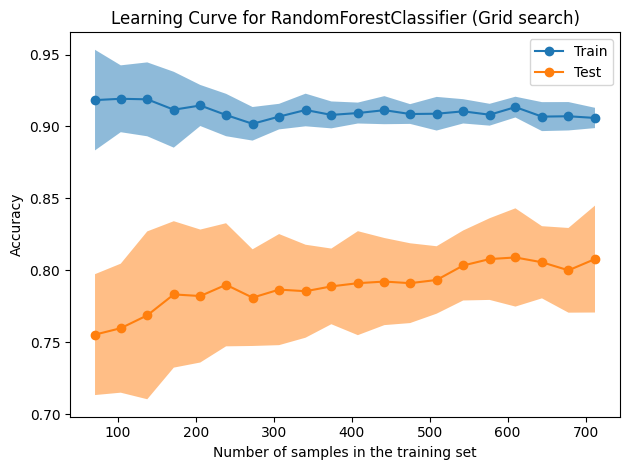

<Figure size 800x600 with 0 Axes>

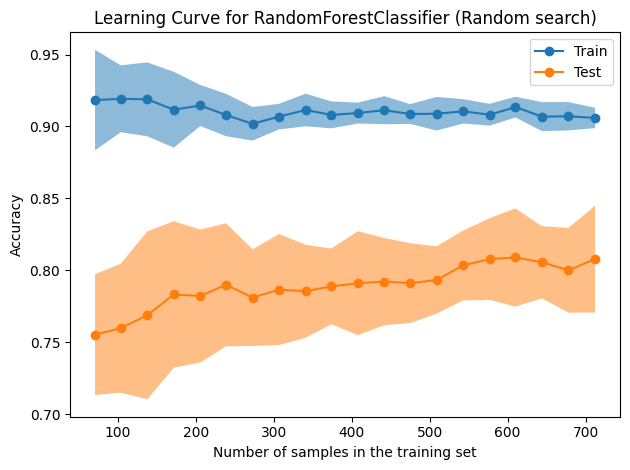

Test Accuracy grid RandomForestClassifier: 0.7947761194029851
Test Accuracy rand RandomForestClassifier: 0.7947761194029851
Classification Report grid:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       161
           1       0.82      0.63      0.71       107

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268

Classification Report rand:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       161
           1       0.82      0.63      0.71       107

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



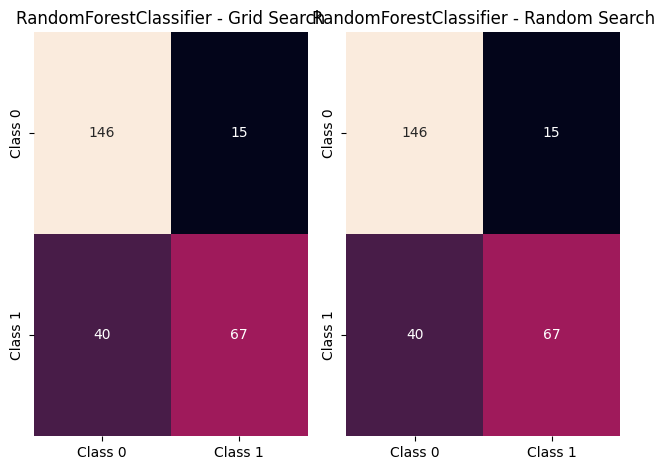

In [14]:
rf=RandomForestClassifier()
parameters_rf={'n_estimators':[50, 100, 200],'min_samples_split':[2, 5, 10, 20], 'criterion':['gini','entropy','log_loss'], 'random_state':[12]}
gridsearch_rf,randsearch_rf=hyper_params_selection(rf, parameters_rf,5,'RandomForestClassifier')
compute_metrics(gridsearch_rf,randsearch_rf, 'RandomForestClassifier')
select_best_hyper_params(gridsearch_rf,randsearch_rf,df_new, 'RandomForestClassifier')